In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [6]:
# X = [1,2,3,4] <=> [x0, x1, x2, x3]
# Y = [2] <=> w_init + w_0*x0 + ... + w_3*x3

# Fake X data
x_data = np.random.random((10000,2))

# Fake sample weights
sample_weights = np.array([3, 4]).reshape(2,)

# Fake y_data
y_data = np.matmul(x_data, sample_weights)


In [7]:
x_data[0]

array([0.43769294, 0.82152581])

In [8]:
y_data[0]

4.5991820748415195

In [9]:
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [10]:
y_data[0]

4.887475466694129

In [11]:
 y_data.shape

(10000,)

In [12]:
y_data = y_data.reshape(len(y_data), 1)

In [13]:
y_data.shape

(10000, 1)

In [14]:
x_data

array([[0.43769294, 0.82152581],
       [0.33960069, 0.15087758],
       [0.43231566, 0.11986343],
       ...,
       [0.3283669 , 0.3445701 ],
       [0.30730418, 0.86642772],
       [0.21089669, 0.79703499]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [19]:
x_train.shape
y_train.shape

(8000, 1)

In [21]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [22]:
# Placeholder for pass data
x = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [28]:
# Trainable weights
w = tf.Variable(tf.ones([n_dim, 1]))
b = tf.Variable(np.random.random(), dtype=tf.float32)

In [30]:
pred = tf.add(tf.matmul(x,w), b)

In [32]:
loss = tf.reduce_mean(tf.square(pred - y))
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)


In [34]:
init = tf.global_variables_initializer()

In [35]:
sess = tf.Session()

In [51]:
# Traning
sess.run(init)
epochs = 5000

loss_history = []


for epoch in range(epochs):
    sess.run(optimizer, feed_dict={x: x_train, y: y_train})
    test_loss = sess.run(loss, feed_dict={x: x_test, y: y_test})
    
    loss_history.append(test_loss)
    if epoch % 500 ==0:
        print("Epoch {} test loss = {}".format(epoch, test_loss))
print("Training finished")

Epoch 0 test loss = 5.836973667144775
Epoch 500 test loss = 0.7559752464294434
Epoch 1000 test loss = 0.4619534909725189
Epoch 1500 test loss = 0.40257686376571655
Epoch 2000 test loss = 0.3598056137561798
Epoch 2500 test loss = 0.3222087025642395
Epoch 3000 test loss = 0.28865334391593933
Epoch 3500 test loss = 0.2586517333984375
Epoch 4000 test loss = 0.23181284964084625
Epoch 4500 test loss = 0.20779526233673096
Training finished


In [45]:
print(loss_history)

[5.8369737, 5.8048124, 5.772847, 5.741075, 5.709496, 5.6781077, 5.64691, 5.6159, 5.5850782, 5.5544443, 5.523994, 5.4937305, 5.4636493, 5.43375, 5.4040337, 5.374494, 5.3451347, 5.315954, 5.28695, 5.258121, 5.2294664, 5.200986, 5.1726775, 5.14454, 5.1165733, 5.0887766, 5.0611477, 5.0336857, 5.0063906, 4.979261, 4.9522943, 4.9254923, 4.8988523, 4.872373, 4.8460536, 4.8198943, 4.7938924, 4.7680497, 4.7423635, 4.7168307, 4.691453, 4.6662307, 4.641158, 4.616239, 4.5914702, 4.566852, 4.542382, 4.5180607, 4.4938855, 4.469857, 4.445975, 4.422236, 4.3986397, 4.3751884, 4.3518786, 4.3287096, 4.30568, 4.282791, 4.260038, 4.237426, 4.214947, 4.1926064, 4.1704006, 4.1483293, 4.1263905, 4.1045847, 4.082911, 4.061368, 4.0399556, 4.0186715, 3.9975173, 3.9764912, 3.9555912, 3.934817, 3.914171, 3.8936474, 3.8732495, 3.8529735, 3.832821, 3.8127894, 3.7928789, 3.7730892, 3.7534194, 3.7338676, 3.7144346, 3.6951187, 3.6759202, 3.656837, 3.6378696, 3.6190162, 3.600277, 3.5816507, 3.5631368, 3.544735, 3.526444

In [53]:
sess.run(w)

array([[2.2039506],
       [2.7844205]], dtype=float32)

In [47]:
sess.run(b)

1.8448515

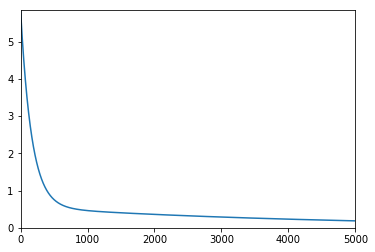

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()